# Recommended $ESR_{MAX}$ Calculator

In [21]:
import numpy as np
import matplotlib.pyplot as plt

$SF = \frac{|-R|}{ESR}$  
$−R = gmX_{C1′}X_{C2′}$  
$X_{C1′} = \frac{1}{jw(C_1+C_{in})}$  
$X_{C2′} = \frac{1}{jw(C_2+C_{out})}$  
$CL = \frac{C_1*C_2}{C_1+C_2}$

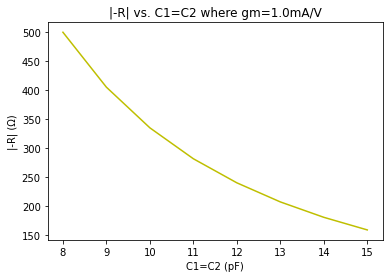

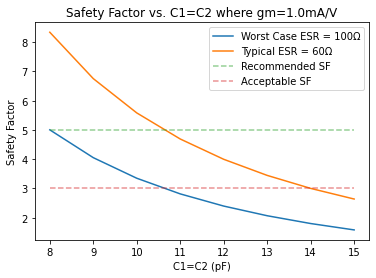

In [99]:
freq = 25e6
c1 = np.arange(8e-12, 16e-12, 1e-12)
c2 = c1
c_junction = 1e-12
esr_max = 100
esr_typical = 60
gm = 1e-3

xc1 = 1/( 1j * 2 * np.pi * freq * ( c1 + c_junction ) )
xc2 = 1/( 1j * 2 * np.pi * freq * ( c2 + c_junction ) )
r = gm * xc1 * xc2
sf_max = np.abs(r)/esr_max
sf_critical = np.abs(r)/esr_max
sf_typical = np.abs(r)/esr_typical

plt.title(f'|-R| vs. C1=C2 where gm={gm*1e3}mA/V')
plt.xlabel('C1=C2 (pF)')
plt.ylabel('|-R| (Ω)')
plt.plot(c1*1e12, np.abs(r), 'y')

plt.figure()
plt.title(f'Safety Factor vs. C1=C2 where gm={gm*1e3}mA/V')
plt.ylabel('Safety Factor')
plt.xlabel('C1=C2 (pF)')
plt.plot(c1*1e12, sf_max, label=f'Worst Case ESR = {esr_max}Ω')
plt.plot(c1*1e12, sf_typical, label=f'Typical ESR = {esr_typical}Ω')
plt.plot(c1*1e12, 5+np.zeros(c1.size), '--', alpha=0.5, label=f'Recommended SF')
plt.plot(c1*1e12, 3+np.zeros(c1.size), '--', alpha=0.5, label=f'Acceptable SF')
plt.legend()